In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import geopandas
import numpy as np
import cartopy.feature as cfeature
from cartopy import crs as ccrs
from shapely import geometry
from datetime import datetime

In [100]:
hs_df = geopandas.GeoDataFrame()

for day in range(1, 32):
    date_object = datetime(2019, 7, day)
    file = '../data/processed/LATE_2km_hotspot_grid_' + date_object.strftime("%Y%m%d") + '.geojson'
    temp = geopandas.read_file(file)
    temp['sat_date'] = date_object.strftime("%d/%m/%Y")
    hs_df = hs_df.append(temp)

In [101]:
hs_df.crs = {'init': 'epsg:3857'}
hs_df['id_grid'] = hs_df.index

In [102]:
clip_area = geopandas.read_file('../references/verification/July_updated_PMsia.shp')
clip_area = clip_area.to_crs({'init': 'epsg:3857'})

In [103]:
truth_df = pd.read_csv('../references/verification/july_ground_truth_2019.csv')

In [104]:
truth_df.drop(columns=["Unnamed: 0"], inplace=True)

In [105]:
truth_gdf = geopandas.GeoDataFrame(truth_df, geometry=geopandas.points_from_xy(truth_df.lon, truth_df.lat))

In [106]:
truth_gdf.crs = {'init' :'epsg:4326'}
truth_gdf = truth_gdf.to_crs({'init': 'epsg:3857'})

In [107]:
truth_gdf_b500 = truth_gdf.buffer(1000)

In [108]:
truth_gdf.geometry = truth_gdf_b500

In [109]:
hs_df_clipped = geopandas.overlay(clip_area, hs_df, how='intersection')

In [110]:
hs_df_clipped.drop(columns=['id'], inplace=True)
hs_df_clipped.head()

,weight,geo_weight,polar_weight,geo_weight_0,geo_weight_4,geo_weight_8,geo_weight_12,geo_weight_16,geo_weight_20,adj_weight,sat_date,id_grid,geometry
0,0.0490,0.0490,0.0000,0.0490,0.0490,0.0490,0.0490,0.0490,0.0392,0.221359,26/07/2019,2919,"POLYGON ((11331976.873 -13195.474, 11333976.87..."
1,0.0098,0.0098,0.0000,0.0098,0.0098,0.0098,0.0098,0.0098,0.0098,0.098995,02/07/2019,2436,"POLYGON ((11320593.302 -15195.474, 11320603.45..."
2,0.0775,0.0000,0.0775,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.278388,22/07/2019,1444,"POLYGON ((11321976.873 -13195.474, 11323976.87..."
3,0.0196,0.0196,0.0000,0.0196,0.0196,0.0196,0.0196,0.0196,0.0196,0.140000,11/07/2019,5772,"POLYGON ((11323976.873 -13195.474, 11325976.87..."
4,0.0662,0.0000,0.0662,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.257294,11/07/2019,5773,"POLYGON ((11335976.873 -13195.474, 11337976.87..."


In [111]:
truth_gdf['id_truth'] = truth_gdf.index
truth_gdf.head()

,datestamp,lat,lon,period,geometry,end_date,start_date,id_truth
0,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,"POLYGON ((11321826.418 -14118.750, 11321821.60...",20/7/2019 0:00,20/7/2019 0:00,0
1,20/7/2019,-0.137187,101.699419,0 days 00:00:00.000000000,"POLYGON ((11322127.537 -15271.632, 11322122.72...",20/7/2019 0:00,20/7/2019 0:00,1
2,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,"POLYGON ((11323194.379 -13912.263, 11323189.56...",20/7/2019 0:00,20/7/2019 0:00,2
3,25/7/2019,-0.127913,101.708152,0 days 00:00:00.000000000,"POLYGON ((11323099.746 -14239.200, 11323094.93...",25/7/2019 0:00,25/7/2019 0:00,3
4,25/7/2019,-0.132241,101.698337,0 days 00:00:00.000000000,"POLYGON ((11322007.089 -14721.002, 11322002.27...",25/7/2019 0:00,25/7/2019 0:00,4


In [112]:
overlaid_gdf_ungrp = geopandas.overlay(truth_gdf, hs_df_clipped, how='union')

In [113]:
overlaid_gdf_ungrp.head()

,datestamp,lat,lon,period,end_date,start_date,id_truth,weight,geo_weight,polar_weight,geo_weight_0,geo_weight_4,geo_weight_8,geo_weight_12,geo_weight_16,geo_weight_20,adj_weight,sat_date,id_grid,geometry
0,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,0.0,0.0462,0.0000,0.0462,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.214942,22/07/2019,1442.0,"POLYGON ((11320603.711 -13144.882, 11320631.32..."
1,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,2.0,0.0462,0.0000,0.0462,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.214942,22/07/2019,1442.0,"POLYGON ((11321497.954 -13195.474, 11321559.98..."
2,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,0.0,0.1862,0.1862,0.0000,0.1862,0.1862,0.1862,0.1862,0.1862,0.1862,0.431509,12/07/2019,4234.0,"POLYGON ((11320603.711 -13144.882, 11320631.32..."
3,20/7/2019,-0.124976,101.709003,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,2.0,0.1862,0.1862,0.0000,0.1862,0.1862,0.1862,0.1862,0.1862,0.1862,0.431509,12/07/2019,4234.0,"POLYGON ((11321497.954 -13195.474, 11321559.98..."
4,20/7/2019,-0.126831,101.696714,0 days 00:00:00.000000000,20/7/2019 0:00,20/7/2019 0:00,0.0,0.0196,0.0196,0.0000,0.0196,0.0196,0.0196,0.0196,0.0196,0.0098,0.140000,28/07/2019,3550.0,"POLYGON ((11320603.711 -13144.882, 11320631.32..."


In [114]:
overlaid_gdf = overlaid_gdf_ungrp.sort_values(by=['adj_weight']).groupby(['id_grid', 'sat_date']).last()

In [115]:
#overlaid_gdf_ungrp.shape
overlaid_gdf_ungrp.loc[overlaid_gdf_ungrp['sat_date'] == '25/07/2019']
overlaid_gdf

datestamp       lat         lon  \
id_grid sat_date                                         
128.0   10/07/2019           NaN       NaN         NaN   
129.0   10/07/2019           NaN       NaN         NaN   
130.0   10/07/2019           NaN       NaN         NaN   
131.0   10/07/2019           NaN       NaN         NaN   
132.0   10/07/2019           NaN       NaN         NaN   
133.0   10/07/2019           NaN       NaN         NaN   
134.0   10/07/2019           NaN       NaN         NaN   
        14/07/2019           NaN       NaN         NaN   
135.0   10/07/2019           NaN       NaN         NaN   
        14/07/2019           NaN       NaN         NaN   
138.0   14/07/2019           NaN       NaN         NaN   
139.0   14/07/2019           NaN       NaN         NaN   
144.0   14/07/2019           NaN       NaN         NaN   
145.0   14/07/2019           NaN       NaN         NaN   
150.0   14/07/2019           NaN       NaN         NaN   
151.0   10/07/2019           NaN       NaN         NaN   
        14/07/2019           NaN       NaN         NaN   
152.0   10/07/2019           NaN       NaN         NaN   
        14/07/2019           NaN       NaN         NaN   
153.0   14/07/2019           NaN       NaN         NaN   
155.0   10/07/2019           NaN       NaN         NaN   
156.0   10/07/2019           NaN       NaN         NaN   
157.0   10/07/2019           NaN       NaN         NaN   
158.0   10/07/2019           NaN       NaN         NaN   
159.0   10/07/2019           NaN       NaN         NaN   
        14/07/2019           NaN       NaN         NaN   
160.0   14/07/2019           NaN       NaN         NaN   
161.0   14/07/2019           NaN       NaN         NaN   
162.0   10/07/2019           NaN       NaN         NaN   
        14/07/2019           NaN       NaN         NaN   
...                          ...       ...         ...   
6259.0  11/07/2019           NaN       NaN         NaN   
6260.0  11/07/2019           NaN       NaN         NaN   
6261.0  11/07/2019           NaN       NaN         NaN   
6262.0  11/07/2019           NaN       NaN         NaN   
6263.0  11/07/2019           NaN       NaN         NaN   
6264.0  11/07/2019           NaN       NaN         NaN   
6265.0  11/07/2019           NaN       NaN         NaN   
6266.0  11/07/2019           NaN       NaN         NaN   
6267.0  11/07/2019           NaN       NaN         NaN   
6268.0  11/07/2019           NaN       NaN         NaN   
6269.0  11/07/2019           NaN       NaN         NaN   
6270.0  11/07/2019           NaN       NaN         NaN   
6271.0  11/07/2019           NaN       NaN         NaN   
6272.0  11/07/2019           NaN       NaN         NaN   
6273.0  11/07/2019           NaN       NaN         NaN   
6274.0  11/07/2019           NaN       NaN         NaN   
6275.0  11/07/2019           NaN       NaN         NaN   
6276.0  11/07/2019           NaN       NaN         NaN   
6277.0  11/07/2019           NaN       NaN         NaN   
6278.0  11/07/2019           NaN       NaN         NaN   
6279.0  11/07/2019           NaN       NaN         NaN   
6280.0  11/07/2019  25-30/7/2019 -2.830773  114.005396   
6281.0  11/07/2019  25-30/7/2019 -2.830773  114.005396   
6282.0  11/07/2019           NaN       NaN         NaN   
6283.0  11/07/2019           NaN       NaN         NaN   
6284.0  11/07/2019           NaN       NaN         NaN   
6287.0  11/07/2019  25-30/7/2019 -2.942903  114.077344   
6288.0  11/07/2019  25-30/7/2019 -2.942903  114.077344   
6289.0  11/07/2019   5-25/7/2019 -2.972601  114.078415   
6290.0  11/07/2019   5-25/7/2019 -2.972601  114.078415   

                                        period        end_date  \
id_grid sat_date                                                 
128.0   10/07/2019                         NaN             NaN   
129.0   10/07/2019                         NaN             NaN   
130.0   10/07/2019                         NaN             NaN   
131.0   10/07/2019                    

In [116]:
overlaid_gdf.loc[overlaid_gdf['adj_weight'].isna(), 'adj_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['polar_weight'].isna(), 'polar_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['geo_weight'].isna(), 'geo_weight'] = 0

In [117]:
overlaid_gdf = overlaid_gdf.reset_index()
overlaid_gdf = geopandas.GeoDataFrame(overlaid_gdf)

In [118]:
overlaid_gdf.loc[overlaid_gdf['lat'].isna(), 'truth_flag'] = 0
overlaid_gdf['start_date'].unique()

array([nan, '16/7/2019 0:00', '1/7/2019 0:00', '31/7/2019 0:00',
       '20/7/2019 0:00', '25/7/2019 0:00', '28/7/2019 0:00',
       '30/7/2019 0:00', '5/7/2019 0:00', '10/7/2019 0:00'], dtype=object)

In [119]:
for index, row in overlaid_gdf.iterrows():
    if pd.isna(row['start_date']):
        pass
    else:
        sat_date =  datetime.strptime(row['sat_date'], "%d/%m/%Y")
        truth_start_date = datetime.strptime(row['start_date'], "%d/%m/%Y %H:%M")
        truth_end_date = datetime.strptime(row['end_date'], "%d/%m/%Y %H:%M")
        if (sat_date >= truth_start_date) and (sat_date <= truth_end_date):
            overlaid_gdf.loc[index, 'truth_flag'] = 1
        else:
            overlaid_gdf.loc[index, 'truth_flag'] = 0 #np.nan

(0, 0.2)

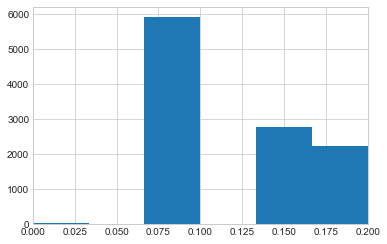

In [120]:
overlaid_gdf['adj_weight'].hist(bins=30)
plt.xlim(0,0.2)

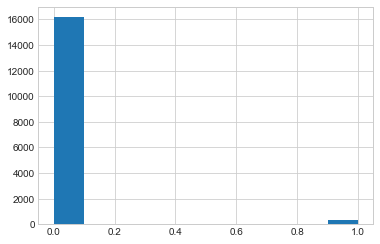

In [121]:
overlaid_gdf['truth_flag'].hist()
#overlaid_gdf.to_file('test.geojson', driver='GeoJSON')

In [122]:
final_gdf = overlaid_gdf.dropna(axis=0, subset=['truth_flag'])

In [123]:
import numpy as np
alpha_list = np.linspace(0, 1.0, 11)
roc_df = pd.DataFrame({'alpha':alpha_list})
csi_df = pd.DataFrame({'alpha':alpha_list})
pod_df = pd.DataFrame({'alpha':alpha_list})
far_df = pd.DataFrame({'alpha':alpha_list})
sunglint_angle_list = np.arange(0, 24, 4)


In [124]:
for i in sunglint_angle_list:
    roc_df['roc_' + str(i)] = np.nan
    csi_df['csi_' + str(i)] = np.nan
    pod_df['pod_' + str(i)] = np.nan
    far_df['far_' + str(i)] = np.nan

In [125]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = final_gdf[final_gdf.truth_flag==0]
df_minority = final_gdf[final_gdf.truth_flag==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


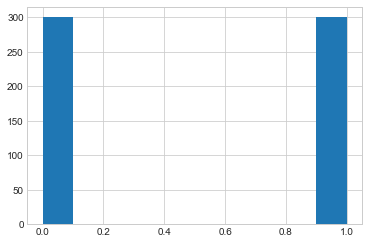

In [152]:
df_downsampled['truth_flag'].hist()

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [127]:
y = df_downsampled['truth_flag'].values
param_list = []
for alpha in alpha_list:
    for sunglint_angle in sunglint_angle_list:
        logisticRegr = LogisticRegression(fit_intercept=True, penalty='none', solver='newton-cg')
        total_weight_downsampled = ((1 - alpha) * df_downsampled['geo_weight_' + str(sunglint_angle)]) + (alpha * df_downsampled['polar_weight'])
        total_weight_downsampled = total_weight_downsampled.values.astype(float)
        x = total_weight_downsampled.reshape(-1,1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)
        logisticRegr.fit(x_train, y_train)
        y_pred = logisticRegr.predict(x_test)
        y_proba_pred = logisticRegr.predict_proba(x_test)[:, 1]
        logit_roc_auc = roc_auc_score(y_test, y_proba_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba_pred)
        csi = 1/((1/(1-fpr)) + (1/tpr) - 1)
        param = {'csi': csi, 'tpr': tpr, 'fpr': fpr, 'proba': thresholds, 'alpha': alpha, 'sg_angle': sunglint_angle,
                 'roc': logit_roc_auc, 'model': logisticRegr, 'x': x_test, 'y': y_test}
        param_list.append(param)
        roc_df.loc[roc_df['alpha'] == alpha, 'roc_' + str(sunglint_angle)] = logit_roc_auc
        csi_df.loc[roc_df['alpha'] == alpha, 'csi_' + str(sunglint_angle)] = csi.max()
        pod_df.loc[roc_df['alpha'] == alpha, 'pod_' + str(sunglint_angle)] = tpr[csi.argmax()]
        far_df.loc[roc_df['alpha'] == alpha, 'far_' + str(sunglint_angle)] = fpr[csi.argmax()]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: Runtime

In [128]:
roc_df

,alpha,roc_0,roc_4,roc_8,roc_12,roc_16,roc_20
0,0.0,0.446859,0.554522,0.594216,0.617241,0.639528,0.655646
1,0.1,0.598084,0.712838,0.754283,0.780715,0.806778,0.829435
2,0.2,0.682446,0.762940,0.791859,0.808897,0.837355,0.850433
3,0.3,0.723890,0.783754,0.811383,0.828237,0.846012,0.854485
4,0.4,0.756309,0.802174,0.826672,0.838000,0.851170,0.858353
5,0.5,0.771597,0.814883,0.832934,0.842789,0.853933,0.859458
6,0.6,0.775649,0.817093,0.832013,0.841499,0.851722,0.857801
7,0.7,0.778965,0.818935,0.833671,0.842789,0.852459,0.859274
8,0.8,0.776570,0.816172,0.830908,0.840026,0.849696,0.857064
9,0.9,0.772518,0.812120,0.826856,0.835973,0.845644,0.853012


(6.0, 0.0)

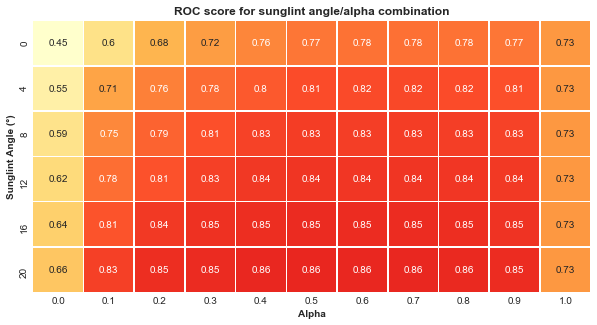

In [129]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
roc_df = roc_df.round(4)
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
y_axis_labels = [0, 4, 8, 12, 16, 20]
sns.heatmap(roc_df.set_index('alpha').transpose(), vmin=0.5, vmax=1, ax=ax, annot=True, cmap='YlOrRd', linewidths=.5, yticklabels=y_axis_labels, cbar=False)
ax.set_ylabel('Sunglint Angle (°)', fontweight="bold")
ax.set_xlabel('Alpha', fontweight="bold")
plt.title('ROC score for sunglint angle/alpha combination', size=12, fontweight="bold")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.0, 0.0)

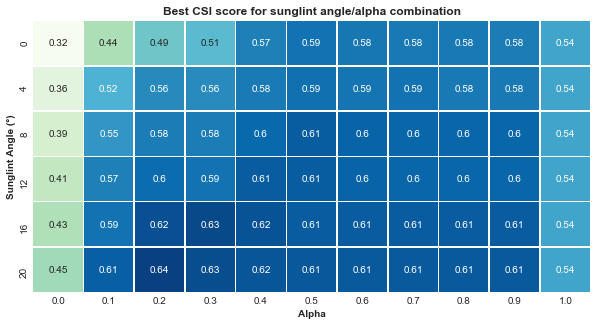

In [130]:
csi_df = csi_df.round(4)
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
y_axis_labels = [0, 4, 8, 12, 16, 20]
sns.heatmap(csi_df.set_index('alpha').transpose(), ax=ax, annot=True, cmap='GnBu', linewidths=.5, yticklabels=y_axis_labels, cbar=False)
ax.set_ylabel('Sunglint Angle (°)', fontweight="bold")
ax.set_xlabel('Alpha', fontweight="bold")
plt.title('Best CSI score for sunglint angle/alpha combination', size=12, fontweight="bold")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.0, 0.0)

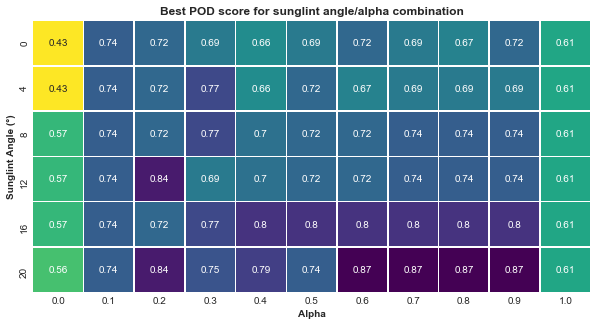

In [131]:
pod_df = pod_df.round(4)
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
y_axis_labels = [0, 4, 8, 12, 16, 20]
sns.heatmap(pod_df.set_index('alpha').transpose(), ax=ax, annot=True, cmap='viridis_r', linewidths=.5, yticklabels=y_axis_labels, cbar=False)
ax.set_ylabel('Sunglint Angle (°)', fontweight="bold")
ax.set_xlabel('Alpha', fontweight="bold")
plt.title('Best POD score for sunglint angle/alpha combination', size=12, fontweight="bold")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.0, 0.0)

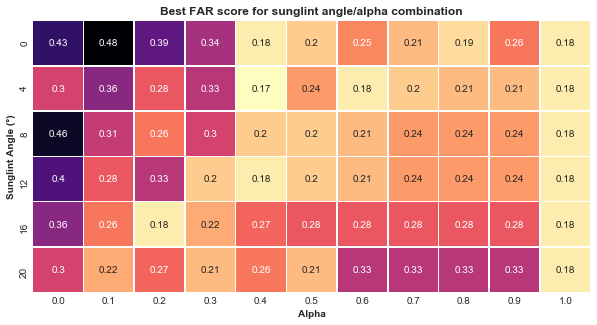

In [132]:
far_df = far_df.round(4)
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
y_axis_labels = [0, 4, 8, 12, 16, 20]
sns.heatmap(far_df.set_index('alpha').transpose(), ax=ax, annot=True, cmap='magma_r', linewidths=.5, yticklabels=y_axis_labels, cbar=False)
ax.set_ylabel('Sunglint Angle (°)', fontweight="bold")
ax.set_xlabel('Alpha', fontweight="bold")
plt.title('Best FAR score for sunglint angle/alpha combination', size=12, fontweight="bold")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [133]:
alpha_chosen = 0.5
sg_angle_chosen = 12
for i in range(0, len(param_list)):
    if (np.round(param_list[i]['alpha'], 2) == alpha_chosen) & (param_list[i]['sg_angle'] == sg_angle_chosen):
        param_chosen = param_list[i]
        break

(0.2, 1.0)

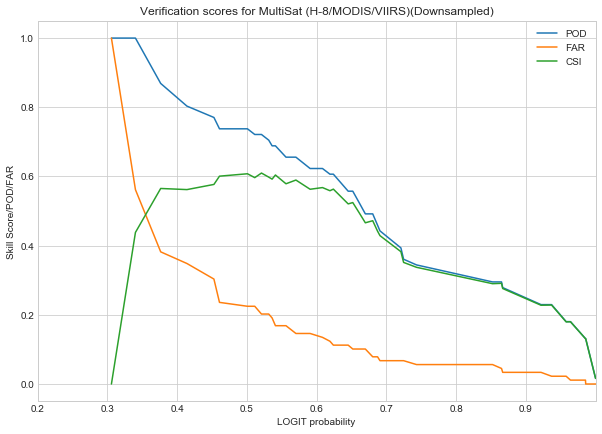

In [134]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()

ax.plot(param_chosen['proba'], param_chosen['tpr'], label='POD');
ax.plot(param_chosen['proba'], param_chosen['fpr'], label='FAR');
ax.plot(param_chosen['proba'], param_chosen['csi'], label='CSI');
ax.legend()
ax.set_xlabel('LOGIT probability')
ax.set_ylabel('Skill Score/POD/FAR')
plt.xticks(np.arange(0, 1, step=0.1))
plt.title('Verification scores for MultiSat (H-8/MODIS/VIIRS)(Downsampled)')
plt.xlim(0.2, 1.0) 

In [135]:
print (param_chosen['csi'][param_chosen['proba'] > 0.5])
print (param_chosen['tpr'][param_chosen['proba'] > 0.5])
print (param_chosen['fpr'][param_chosen['proba'] > 0.5])

[0.         0.01639344 0.13114754 0.13095238 0.1799591  0.17958341
 0.22830366 0.22768533 0.27600529 0.29104052 0.28998849 0.3373494
 0.35149182 0.38256194 0.42889952 0.44170835 0.47198772 0.46601942
 0.49535604 0.52448901 0.52064354 0.563307   0.55876089 0.56782457
 0.56296296 0.58960434 0.57880329 0.60419907 0.59224442 0.59804114
 0.60979895 0.59658086 0.60775103]
[0.         0.01639344 0.13114754 0.13114754 0.18032787 0.18032787
 0.2295082  0.2295082  0.27868852 0.29508197 0.29508197 0.3442623
 0.36065574 0.39344262 0.44262295 0.45901639 0.49180328 0.49180328
 0.52459016 0.55737705 0.55737705 0.60655738 0.60655738 0.62295082
 0.62295082 0.6557377  0.6557377  0.68852459 0.68852459 0.70491803
 0.72131148 0.72131148 0.73770492]
[0.         0.         0.         0.01123596 0.01123596 0.02247191
 0.02247191 0.03370787 0.03370787 0.04494382 0.05617978 0.05617978
 0.06741573 0.06741573 0.06741573 0.07865169 0.07865169 0.1011236
 0.1011236  0.1011236  0.11235955 0.11235955 0.12359551 0.1348

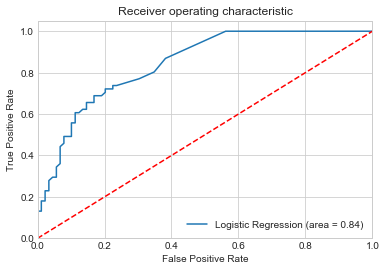

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.figure()
plt.plot(param_chosen['fpr'], param_chosen['tpr'], label='Logistic Regression (area = %0.2f)' % param_chosen['roc'])
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [137]:
print (param_chosen['model'].coef_)

[[32.15260283]]


In [138]:
prob_y = param_chosen['model'].predict_proba(x)

In [139]:
prob_y[:, 1]

array([0.58527563, 0.30587926, 0.30587926, 0.30587926, 0.30587926,
       0.91650684, 0.30587926, 0.30587926, 0.30587926, 0.30587926,
       0.30587926, 0.87141361, 0.30587926, 0.30587926, 0.30587926,
       0.30587926, 0.30587926, 0.30587926, 0.30587926, 0.30587926,
       0.30587926, 0.30587926, 0.30587926, 0.30587926, 0.30587926,
       0.93320205, 0.30587926, 0.30587926, 0.30587926, 0.30587926,
       0.30587926, 0.30587926, 0.30587926, 0.30587926, 0.30587926,
       0.30587926, 0.89214702, 0.92801351, 0.66991335, 0.30587926,
       0.30587926, 0.30587926, 0.73678389, 0.93320205, 0.65190234,
       0.30587926, 0.30587926, 0.30587926, 0.30587926, 0.30587926,
       0.30587926, 0.30587926, 0.30587926, 0.30587926, 0.30587926,
       0.30587926, 0.30587926, 0.30587926, 0.99589772, 0.99855335,
       0.30587926, 0.74480939, 0.30587926, 0.30587926, 0.30587926,
       0.30587926, 0.30587926, 0.62368803, 0.30587926, 0.87567533,
       0.30587926, 0.30587926, 0.30587926, 0.30587926, 0.66991

In [149]:
threshold = np.linspace(0, 1.0, 101)
threshold_prob = param_chosen['model'].predict_proba(threshold.reshape(-1,1))

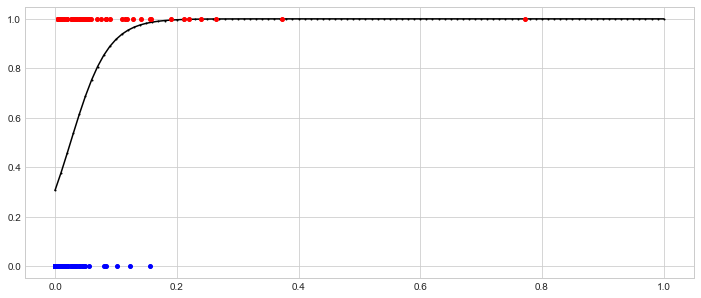

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,5))
plt.style.use('seaborn-whitegrid')
plt.plot(threshold, threshold_prob[:,1], marker='o', color='black', markersize=1);
plt.plot(param_chosen['x'][param_chosen['y']>0], param_chosen['y'][param_chosen['y']>0], '.', color='red', markersize=8)
plt.plot(param_chosen['x'][param_chosen['y']==0], param_chosen['y'][param_chosen['y']==0], '.', color='blue', markersize=8)

In [142]:
print (threshold_prob[:,1])
print (threshold_prob[:,1] > 0.5)

[0.30587926 0.37802738 0.45601316 0.53621712 0.61459023 0.68743927
 0.75207331 0.80709238 0.85229967 0.88837796 0.91650684 0.93804159
 0.954299   0.9664432  0.97544334 0.98207436 0.98693879 0.99049594
 0.99309111 0.99498123 0.99635615 0.99735541 0.99808117 0.99860803
 0.99899038 0.99926778 0.999469   0.99961495 0.99972079 0.99979755
 0.9998532  0.99989356 0.99992283 0.99994404 0.99995943 0.99997058
 0.99997867 0.99998454 0.99998879 0.99999187 0.99999411 0.99999573
 0.9999969  0.99999775 0.99999837 0.99999882 0.99999914 0.99999938
 0.99999955 0.99999967 0.99999976 0.99999983 0.99999988 0.99999991
 0.99999993 0.99999995 0.99999997 0.99999998 0.99999998 0.99999999
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1

In [143]:
print (threshold[:])
print (threshold[threshold_prob[:,1] > 0.75])

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19
 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33
 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47
 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61
 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75
 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [144]:
threshold = np.linspace(0, 1.0, 100)
param_chosen['model'].predict_proba(threshold.reshape(-1,1))[:,1]

array([0.30587926, 0.3787913 , 0.45762491, 0.53863927, 0.61766277,
       0.69091775, 0.75568886, 0.81060727, 0.85554055, 0.89124371,
       0.91895869, 0.94008571, 0.95596892, 0.9677858 , 0.97650924,
       0.98291213, 0.98759196, 0.99100186, 0.99348086, 0.99528014,
       0.99658453, 0.99752933, 0.99821325, 0.99870809, 0.99906601,
       0.99932484, 0.99951198, 0.99964726, 0.99974506, 0.99981574,
       0.99986683, 0.99990376, 0.99993044, 0.99994973, 0.99996367,
       0.99997374, 0.99998103, 0.99998629, 0.99999009, 0.99999284,
       0.99999482, 0.99999626, 0.9999973 , 0.99999805, 0.99999859,
       0.99999898, 0.99999926, 0.99999947, 0.99999961, 0.99999972,
       0.9999998 , 0.99999985, 0.99999989, 0.99999992, 0.99999995,
       0.99999996, 0.99999997, 0.99999998, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [145]:
import pickle

filename = '../models/logit_reg_alpha_0.5_sg_angle_12.sav'
pickle.dump(param_chosen['model'], open(filename, 'wb'))

In [146]:
loaded_model = pickle.load(open(filename, 'rb'))

In [147]:
loaded_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)